A bar chart showing the voter turnout in the two delayed elections being held in P.017 Padang Serai and N.42 Tioman today,with the general GE15 turnout from 19th November for comparison.

As of 09:00: 9% in Padang Serai and 9% in Tioman, vs 9% in GE15
As of 10:00: 19% in Padang Serai and 18% in Tioman, vs 20% in GE15
As of 11:00: 28% in Padang Serai and 27% in Tioman, vs 31% in GE15
As of 12:00: 36% in Padang Serai and 35% in Tioman, vs 42% in GE15
As of 13:00: 43% in Padang Serai and 41% in Tioman, vs 50% in GE15
As of 14:00: 49% in Padang Serai and 45% in Tioman, vs 58% in GE15
As of 15:00: 57% in Padang Serai and 50% in Tioman, vs 65% in GE15
As of 16:00: 63% in Padang Serai and 54% in Tioman, vs 70% in GE15
As of 17:00: 66% in Padang Serai and 56% in Tioman, vs 72% in GE15
As of 18:00: 69% in Padang Serai and 58% in Tioman, vs 73% in GE15


c:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


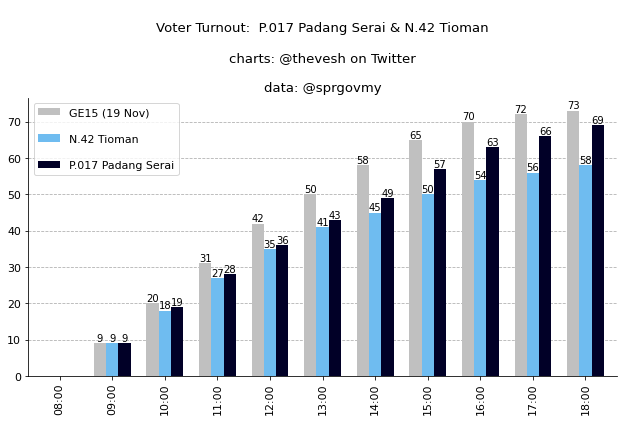

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = [
    ["08:00",np.nan,0.0001,0,0],
    ["09:00",0.0001,9,9,9],
    ["10:00",24,20,18,19],
    ["11:00",36,31,27,28],
    ["12:00",47,42,35,36],
    ["13:00",55,50,41,43],
    ["14:00",62,58,45,49],
    ["15:00",69,65,50,57],
    ["16:00",76,70,54,63],
    ["17:00",82.32,72,56,66],
    ["18:00",np.nan,73.11,58,69]
]

df = pd.DataFrame(data=data,columns=['time','ge14','ge15','tioman','pserai']).set_index('time')
df.columns = ['GE14 Turnout','GE15 (19 Nov)','N.42 Tioman','P.017 Padang Serai']
for c in df.columns: df[c] = df[c].round(0)

plt.rcParams.update({'font.size': 11,
                     'font.family': 'sans-serif',
                     'grid.linestyle': 'dashed'})
plt.rcParams["figure.figsize"] = [8.8,6]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()


df.plot(kind='bar', width=0.7, y=[x for x in df.columns if 'GE14' not in x], edgecolor='black', lw=0, color=['#C0C0C0','#6fbcf0','#010027'], ax=ax)
ax.set_title('\nVoter Turnout:  P.017 Padang Serai & N.42 Tioman\n\ncharts: @thevesh on Twitter\n\ndata: @sprgovmy')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('')
ax.legend(labelspacing = 1.5)
for c in ax.containers:
    labels = [f'{h:0.0f}' if (h := v.get_height()) != 0 else '' for v in c ]
    ax.bar_label(c, labels=labels,fontsize=10)

str = (f'A bar chart showing the voter turnout in the two delayed elections '
f'being held in P.017 Padang Serai and N.42 Tioman today,' 
f'with the general GE15 turnout from 19th November for comparison.\n')

for i in range(1, len(df)):
    str += \
    (f'\nAs of {df.index[i]}: '
    f'{df["P.017 Padang Serai"][i]}% in Padang Serai and '
    f'{df["N.42 Tioman"][i]}% in Tioman, vs '
    f'{df["GE15 (19 Nov)"][i]}% in GE15')
str = str.replace('.0%','%').replace('nan%','?%')
print(str)

In [7]:
df = df[['GE14 Turnout', 'GE15 (19 Nov)']]

In [9]:
df = df.rename(columns={"GE15 (19 Nov)": "GE15 Turnout"})

In [11]:
df.to_csv("GE15_turnout.csv")